# Regression with TensorFlow

Predicting a numerical variable based on some other combination of variables.

In [31]:
# Import TensorFlow
import tensorflow as tf
tf.__version__

'2.2.0'

### Creating some data to view and fit

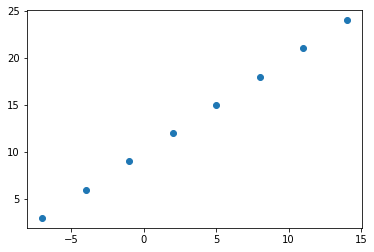

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualiza it
plt.scatter(X, y)

In [5]:
# The relationship between X and y is y = X+10

y == X+10

# This is the function we want our neural network to learn

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Inputs and outputs shapes

In [6]:
# Create a demo tensor for a mock housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [8]:
# What is input and output shapes for our created X and y?
# We want one feature to predict one label, so we take the [0] index.
# We'll get empty shapes because we just have a list of scalars.
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [14]:
# Turn our NumPy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

## Steps in modelling with TensorFòpw

1. **Creating a model** - define the input and output layers, as well as the hidden layers.
2. **Compiling a model** - define the loss function, the optimizer and evaluation metrics.
3. **Fitting a model** - letting the model try to find patterns between X and y.

In [15]:
# Set random seed for reproducibility
tf.random.set_seed(42)

# 1. Create a model usin the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae = Mean Absolute Error
              optimizer=tf.keras.optimizers.SGD(), # SGD = Stochastic Gradient Descent
              metrics=["mae"]
             )

# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 886us/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 829us/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 814us/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 667us/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 959us/step - loss: 10.9748 - mae: 10.9748


In [16]:
# Check X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [18]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

### Improving the model
The model is far off, but we can have guessed it by looking at the loss and metric in the
training phase.
We can improve a model by altering any of the three steps we took to create it.
1. **Creating a model** - here we can add more layers, increase the number of hidden units within each of the hidden layer, change the activation function of each layer.
2. **Compiling a model** - here we can change the optimization function or the learning rate.
3. **Fitting a model** - fit a model for more epochs or on more data.

In [19]:
# Rebuild the model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

# 3. Fit the model (this time we will train for longer)
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 940us/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 906us/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 768us/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 866us/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 740us/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 615us/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 938us/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 967us/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [=========================

In [20]:
# Prediction should have improved (mae is now 6.8)
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [22]:
# Rebuild the model

# 1. Create the model (this time adding a hidden layer with relu activation)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 1ms/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 767us/step - loss: 11.7804 - mae: 11.7804
Epoch 3/100
1/1 [==============================] - 0s 707us/step - loss: 11.2324 - mae: 11.2324
Epoch 4/100
1/1 [==============================] - 0s 908us/step - loss: 10.6601 - mae: 10.6601
Epoch 5/100
1/1 [==============================] - 0s 726us/step - loss: 10.0632 - mae: 10.0632
Epoch 6/100
1/1 [==============================] - 0s 875us/step - loss: 9.4503 - mae: 9.4503
Epoch 7/100
1/1 [==============================] - 0s 727us/step - loss: 8.7991 - mae: 8.7991
Epoch 8/100
1/1 [==============================] - 0s 812us/step - loss: 8.1072 - mae: 8.1072
Epoch 9/100
1/1 [==============================] - 0s 808us/step - loss: 7.3691 - mae: 7.3691
Epoch 10/100
1/1 [==============================] - 0s 817us/step - loss: 6.5758 - mae: 6.5758
Epoch 11/100
1/1 [==============================] -

In [23]:
# Prediction should be even better (mae is now around 3.5)
model.predict([17.0])

array([[31.223137]], dtype=float32)

Seems like the previous model get closer to the actual result we want (27). Why?

It can be that our model is overfitting, meaning is learning too well on the training data and it's not able to generalize well on new data.

The metrics we see during training can not be representative of actual how well the model is working: the real evaluation comes from the prediction of data the model hasn't seen before.

Tweaking the steps we changed before can help us avoid this problem (specially adjusting the learning rate of the optimizer).

### Evaluating a model
In practice, a typical workflow is:

Build a model -> fit it -> evaluate it -> tweak the model -> fit it -> evaluate it

And repeat and repeat and repeat.

When it comes to evaluation, visualization helps a lot.
We can visualize:
* The data- what data are we working with? what does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions - how the predictions line up against the ground truth?

In [32]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [33]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

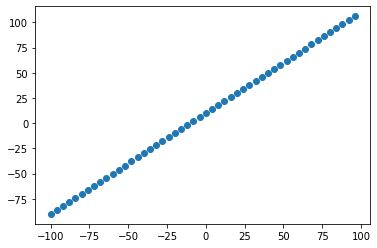

In [4]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The three sets: train, validation, test

* **Training set** - the model learns from this data. Typically 70-80% of the data.
* **Validation set** - the model get tuned on this data. Typically 10-15% of the data.
* **Test set** - the model gets evaluated on this data. Typically 10-15% of the data.

In [5]:
# Check the length of how many samples we have
len(X)

50

In [34]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are test samples (20% of the data)
y_test = y[40:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

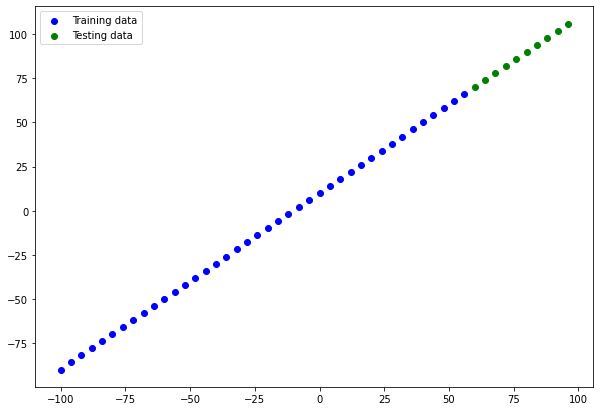

In [7]:
# Visualize the data splitted into train and test

plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.legend()

In [10]:
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

# 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

### Visualize the model

In [11]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [48]:
# Let's create a model that builds automatically by specifing the input shape argument
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="A_model")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

In [49]:
model.summary()

Model: "A_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* **Total Params** - the number of parameters in the model (patterns the model is going to learn)
* **Trainable Params** - the parameters (patterns) the model can update as it trains.
* **Non-trainable Params** - the parameters that aren't updated during training (typical when you bring in already learn patterns from other models during transfer learning)

In [37]:
# Fit the model
model.fit(X_train, y_train, epochs=100, verbose=0)